In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

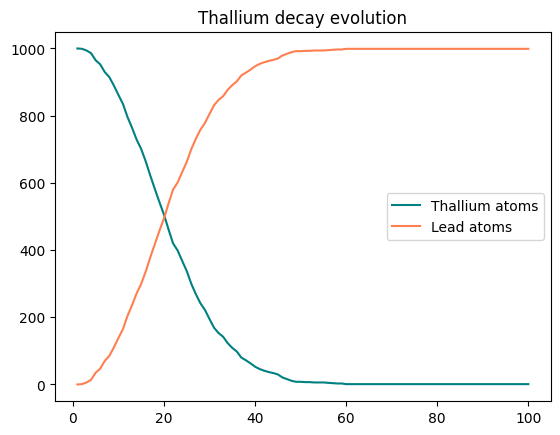

In [2]:
tau = 3.052*60   #seconds

Tl_atoms = np.empty(100)
Nt = 1000  #Tallium atoms
Tl_atoms[0]= Nt

L_atoms = np.empty(100)
Nl = 0     #Lead atoms
L_atoms[0]= Nl


def prob(t, tau):
    return 1-2**(-t/tau)

for t in range(1, 100, 1):
    to_decay = 0
    instant_p = prob(t, tau)
    for i in range(1, Nt, 1): # For every Thallium atom try to see if decaded
        a = 0
        if np.random.rand() <= instant_p: # Decayed
            a=1
        else:
            a=0
        to_decay = to_decay +  a
    
    #Subtract the total number of Tl atoms that decayed at each step from the Tl sample
    Nt = Nt - to_decay
    Tl_atoms[t] = Nt
    #Add them to the Lead one
    Nl = Nl + to_decay
    L_atoms[t] = Nl
    
#Plot the evolution of the two sets as a function of time
fig = plt.figure()
temp = np.linspace(1,100,100)
plt.plot(temp, Tl_atoms, color='teal', label='Thallium atoms')
plt.plot(temp, L_atoms, color='coral', label='Lead atoms')
plt.legend()
plt.title('Thallium decay evolution')


def prob2(t,tau):
    return 2**(-t/tau)*math.log(2)/tau




2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

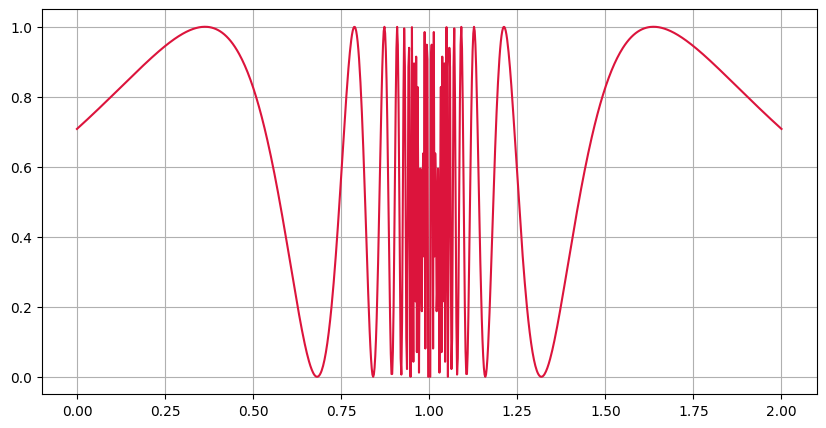

Integral mean:  1.3465554
Integral variance:  5.688438839999959e-06
Integral standard deviation:  0.0023850448297673484
The error is  0.00023850448297673484

Integral calculated with the mean value method:  1.34478961596385
Integral standard deviation with the mean value method:  0.0010337884445423377
With the mean value method, the error is  0.004252598160188897


In [19]:
#define the given function
def f(x):
    return (np.sin(1./(1-x)))**2

#plot the function
fig = plt.figure(figsize=(10,5))
x = np.linspace(0, 2, 1000)
plt.plot(x, f(x), 'crimson')
plt.grid()
plt.show()

#Compute the integral of f(x) between 0 and 2 with the hit/miss method
#repeat the integral N times
N = 100000
Nrepeat = 100
Integ = []
for n in range(Nrepeat):
    count = 0
    for i in range(N):
        x = 2 * np.random.random() # x is random uniform between 0 and 2
        y = np.random.random()     # y is random uniform between 0 and 1
        if y < f(x): 
            count += 1
    I = 2 * count / N
    Integ.append(I)

I_mean = np.mean(Integ)
I_var = np.var(Integ)
I_sd = np.sqrt(I_var)

print('Integral mean: ', I_mean)
print('Integral variance: ', I_var)
print('Integral standard deviation: ', I_sd)


#Evaluate the error of your estimate
err = I_sd/math.sqrt(100)
print('The error is ', err)

#Repeat the integral with the mean value method
x = np.random.uniform(0,2, N)
y = f(x)
I_mvm = (2-0)/N*y.sum()
print('\nIntegral calculated with the mean value method: ', I_mvm)
sigma_mvm = np.sqrt(np.var(y))/np.sqrt(N)
print('Integral standard deviation with the mean value method: ', sigma_mvm)

#Evaluate the error of your estimate
err_mvm = I_mvm/math.sqrt(N)
print('With the mean value method, the error is ', err_mvm)


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [7]:
#define the function 
def circ(x):
    if x[0]**2 + x[1]**2 <=1 : return 1
    else : return 0

dim = 2
points = 100000

#Compute the area of a circle of unit radius
x = np.random.uniform(-1, 1, (points, dim))
val = np.zeros(points)

for i in range(points):
    val[i] = circ(x[i, :])

Ic = (2**dim)*np.mean(val)
print('The area of the circle is: ', Ic)


#Generalize the result for a 10D sphere
dim = 10
points = 1000000

#Compute the ipervolume of a circle of unit radius
x10 = np.random.uniform(-1, 1, (points, dim))
val10 = np.zeros(points)

for i in range(points):
    val10[i] = circ(x10[i, :])

Ic10 = (2**dim)*np.mean(val10)
print('The ipervolume of the 10D sphere is: ', Ic10)



The area of the circle is:  3.1408
The ipervolume of the 10D sphere is:  803.88096


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.